In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("C:/Users/ishwa/Downloads/school1 (1).csv")
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [4]:
df['final_grade'] = 'na'
df.loc[(df.G3 >= 15) & (df.G3 <= 20), 'final_grade'] = 'good' 
df.loc[(df.G3 >= 10) & (df.G3 <= 14), 'final_grade'] = 'fair' 
df.loc[(df.G3 >= 0) & (df.G3 <= 9), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,fair
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,fair
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,fair
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,fair


In [5]:
df.isnull().any()

school         False
sex            False
age            False
address        False
famsize        False
Pstatus        False
Medu           False
Fedu           False
Mjob           False
Fjob           False
reason         False
guardian       False
traveltime     False
studytime      False
failures       False
schoolsup      False
famsup         False
paid           False
activities     False
nursery        False
higher         False
internet       False
romantic       False
famrel         False
freetime       False
goout          False
Dalc           False
Walc           False
health         False
absences       False
G1             False
G2             False
G3             False
final_grade    False
dtype: bool

In [6]:
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

Text(0, 0.5, 'Number of Student')

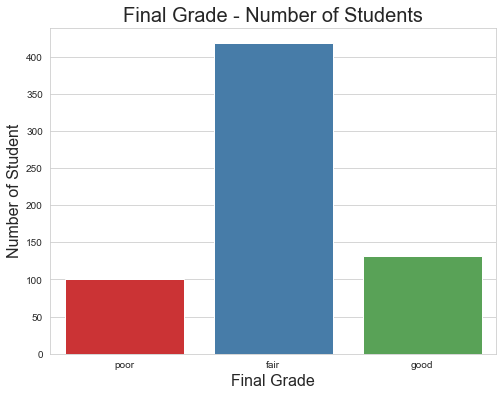

In [7]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(df.final_grade, order=["poor","fair","good"], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)


Text(0.5, 1.0, 'Correlation Heatmap')

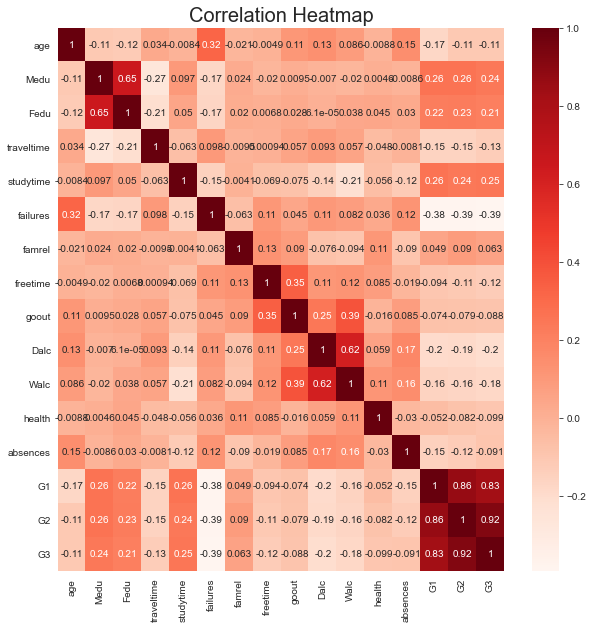

In [8]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [9]:
# create good student dataframe
good = df.loc[df.final_grade == 'good']

# create poor student dataframe
poor = df.loc[df.final_grade == 'poor']

In [10]:
good['good_student_father_education'] = good.Fedu
poor['poor_student_father_education'] = poor.Fedu
good['good_student_mother_education'] = good.Medu
poor['poor_student_mother_education'] = poor.Medu


<ipython-input-10-db7d1cfcea1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['good_student_father_education'] = good.Fedu
<ipython-input-10-db7d1cfcea1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor['poor_student_father_education'] = poor.Fedu
<ipython-input-10-db7d1cfcea1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Text(0.5, 0, 'Father Education Level')

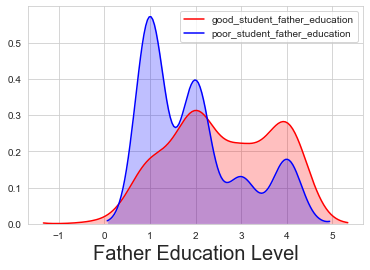

In [11]:
# see the difference between good and poor performers' father education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p2=sns.kdeplot(good['good_student_father_education'], shade=True, color="r")
p2=sns.kdeplot(poor['poor_student_father_education'], shade=True, color="b")
plt.xlabel('Father Education Level', fontsize=20)

Text(0.5, 0, 'Mother Education Level')

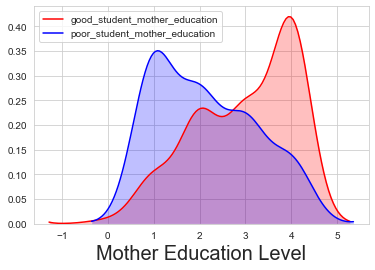

In [12]:
# see the difference between good and poor performers' mother education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p3=sns.kdeplot(good['good_student_mother_education'], shade=True, color="r")
p3=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b")
plt.xlabel('Mother Education Level', fontsize=20)

In [13]:
# use OLS to see coefficients
X_edu = df[['Medu','Fedu']]
y_edu = df.G3
edu = sm.OLS(y_edu, X_edu)
results_edu = edu.fit()
results_edu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     G3   R-squared (uncentered):                   0.838
Model:                            OLS   Adj. R-squared (uncentered):              0.837
Method:                 Least Squares   F-statistic:                              1671.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):                   2.73e-256
Time:                        18:14:29   Log-Likelihood:                         -1961.2
No. Observations:                 649   AIC:                                      3926.
Df Residuals:                     647   BIC:                                      3935.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Medu           2.4559      0.203     12.074      0.000       2.057       2.855
Fedu           1.8362      0.220      8.362      0.000       1.405       2.267
==============================================================================
Omnibus:                        6.868   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.727
Skew:                          -0.237   Prob(JB):                       0.0346
Kurtosis:                       3.157   Cond. No.                         5.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Age')

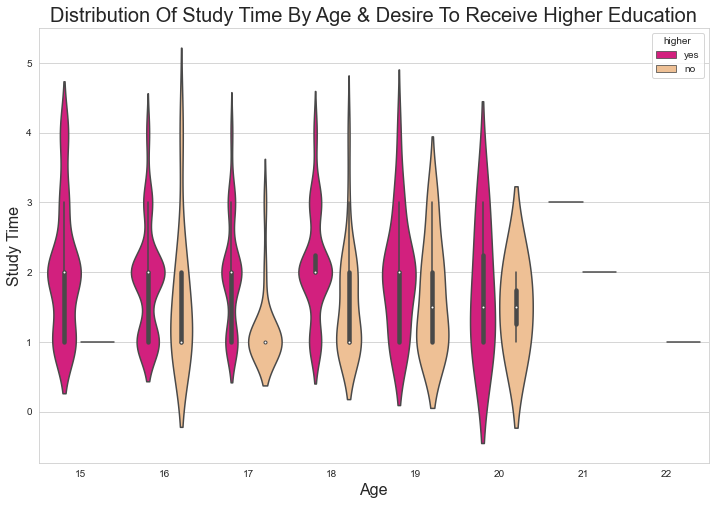

In [14]:
plt.figure(figsize=(12,8))
sns.violinplot(x='age', y='studytime', hue='higher', data=df, palette="Accent_r", ylim=(1,6))
plt.title('Distribution Of Study Time By Age & Desire To Receive Higher Education', fontsize=20)
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('Age', fontsize=16)

In [15]:
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']

In [16]:
higher_tab = pd.crosstab(index=df.final_grade, columns=df.higher)
higher_perc = higher_tab.apply(perc).reindex(index)

In [ ]:
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)